# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [2]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [3]:
url='http://yustiks.ru/housing.csv'
s=requests.get(url).content
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(io.StringIO(s.decode('utf-8')),  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное
2.   Равномерное
3.   Биноминальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное



Ответ
1.   Нормальное - MEDV
2.   Равномерное - нет такого
3.   Биноминальное - нет такого
4.   Бернулли - Распределение: B, ZN, TAX, RAD
5.   Геометрическое - DIS
6.   Логнормальное - LSTAT

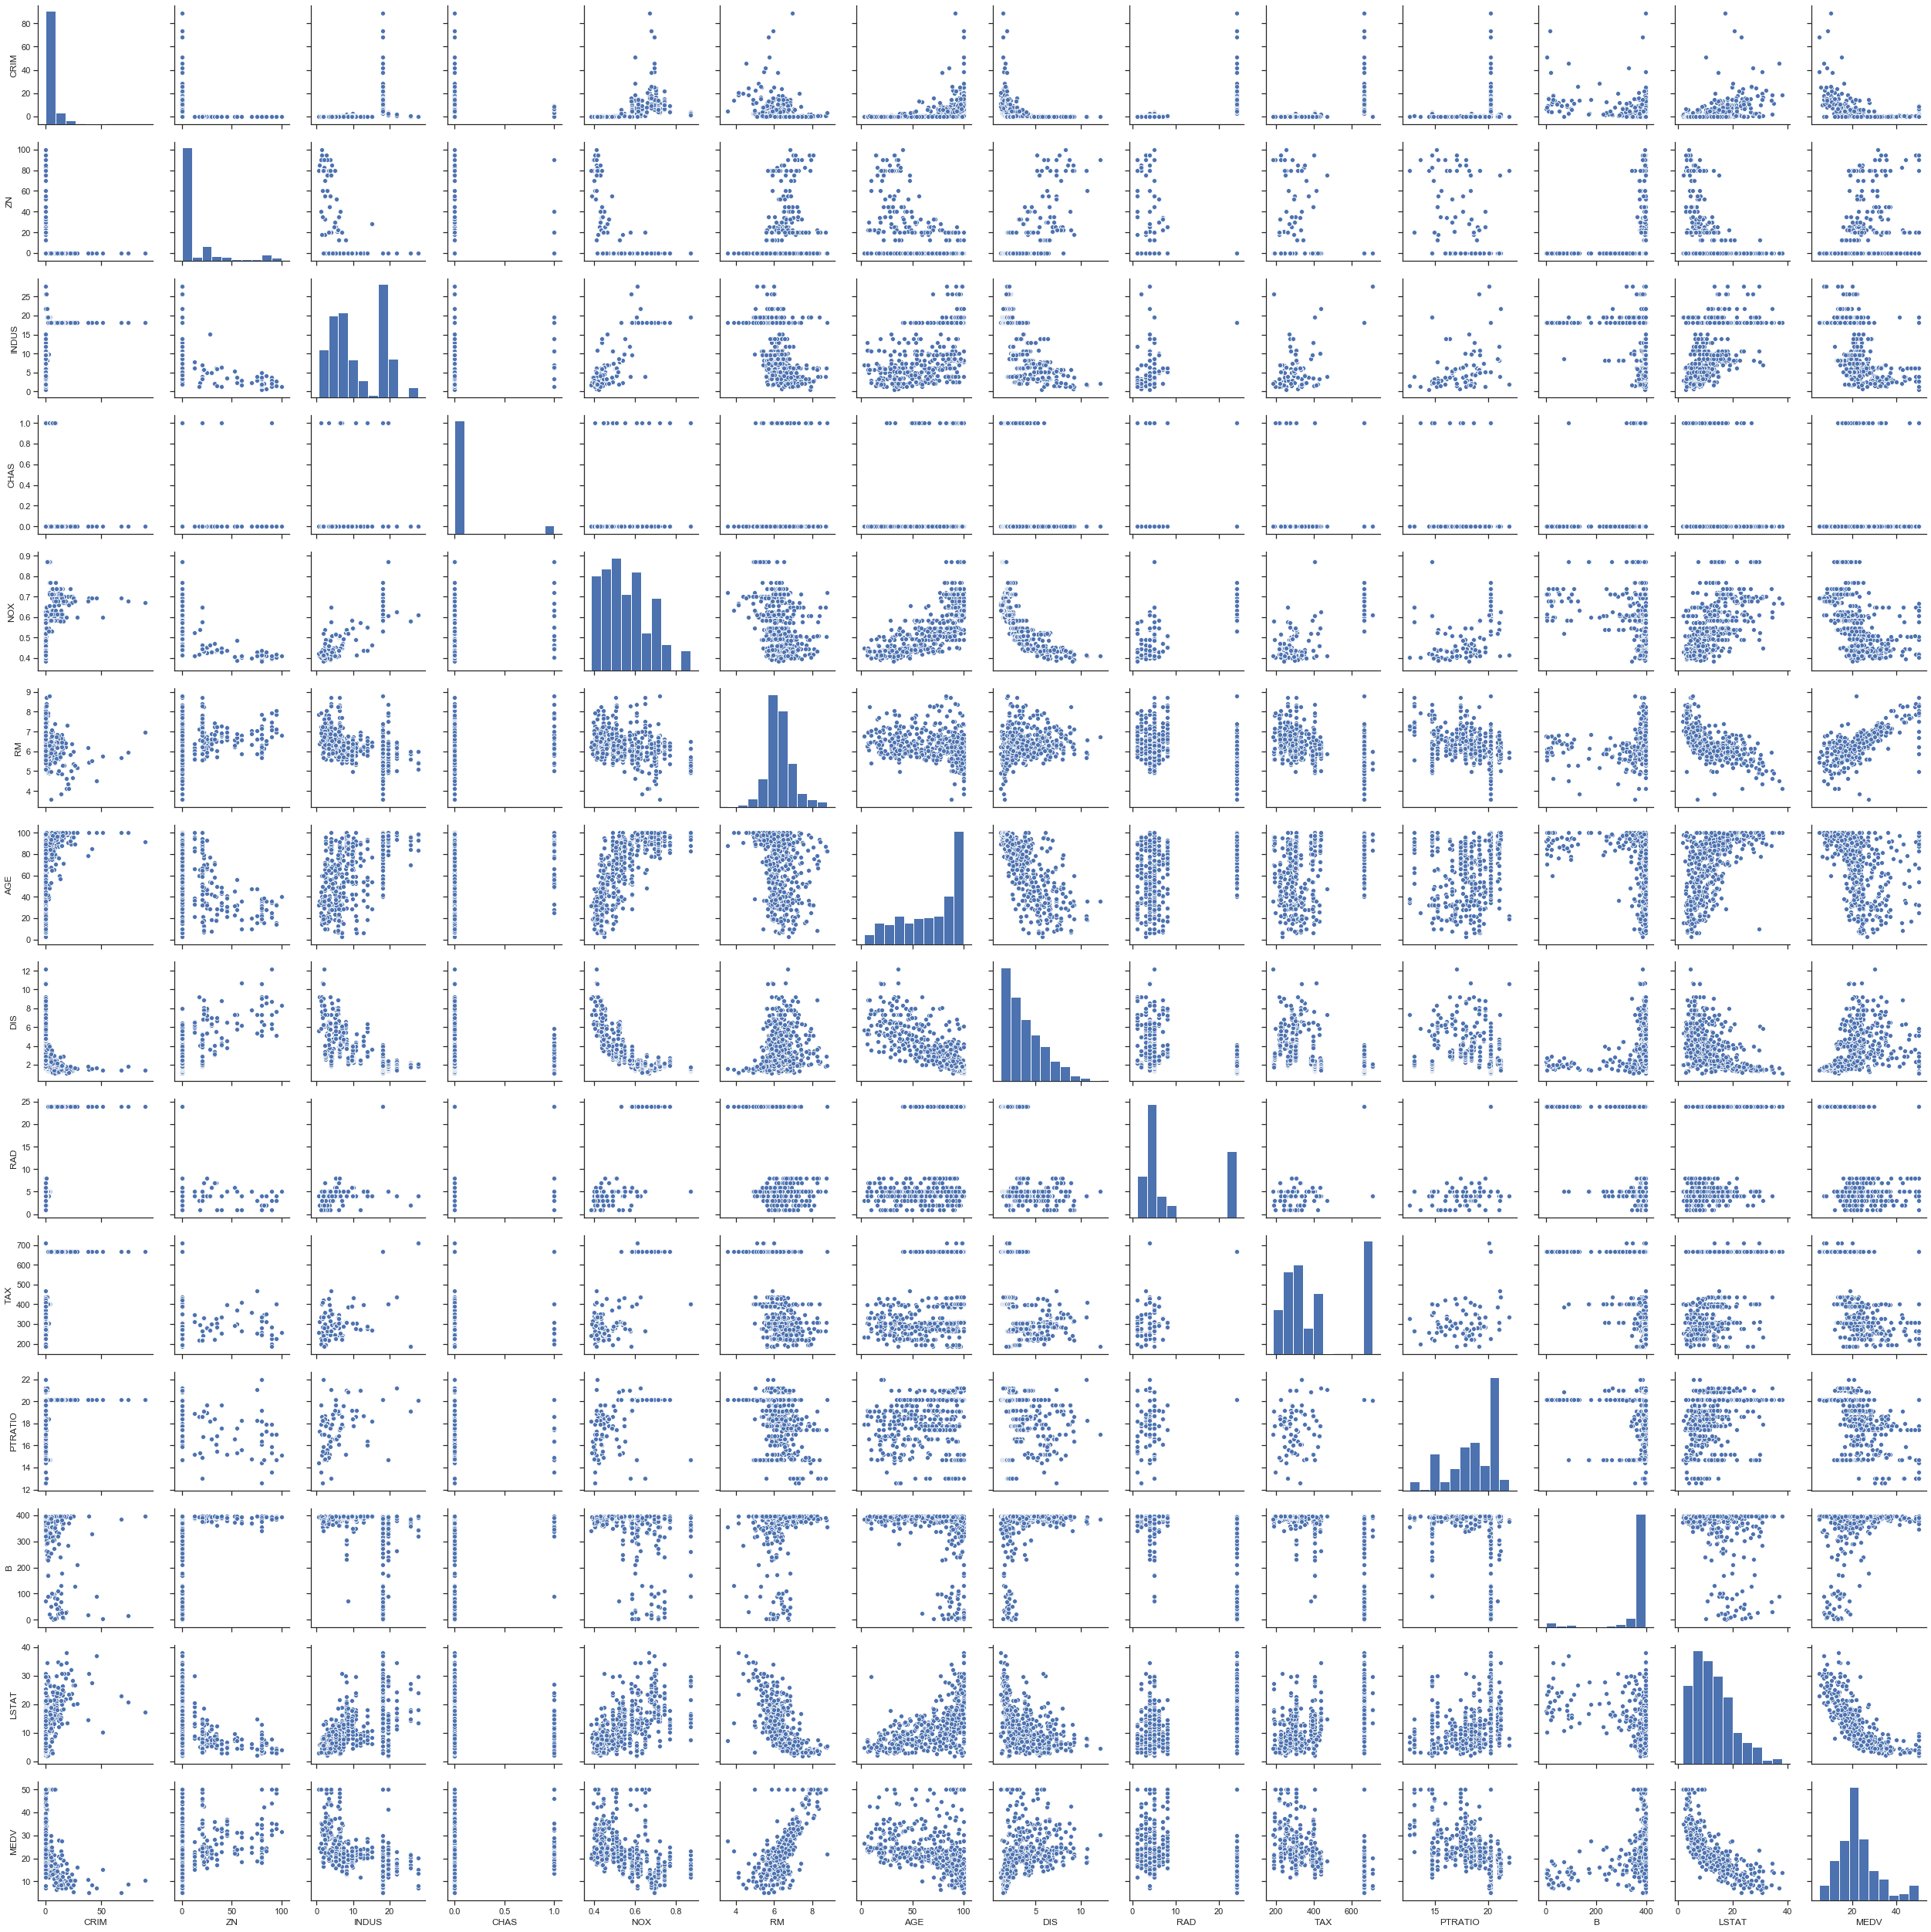

In [3]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data)

In [4]:
# Напишите код, который будет рисовать распределения попарно - точечные распределение
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Тут везде равномерное распределение

c:\users\sladk\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\sladk\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


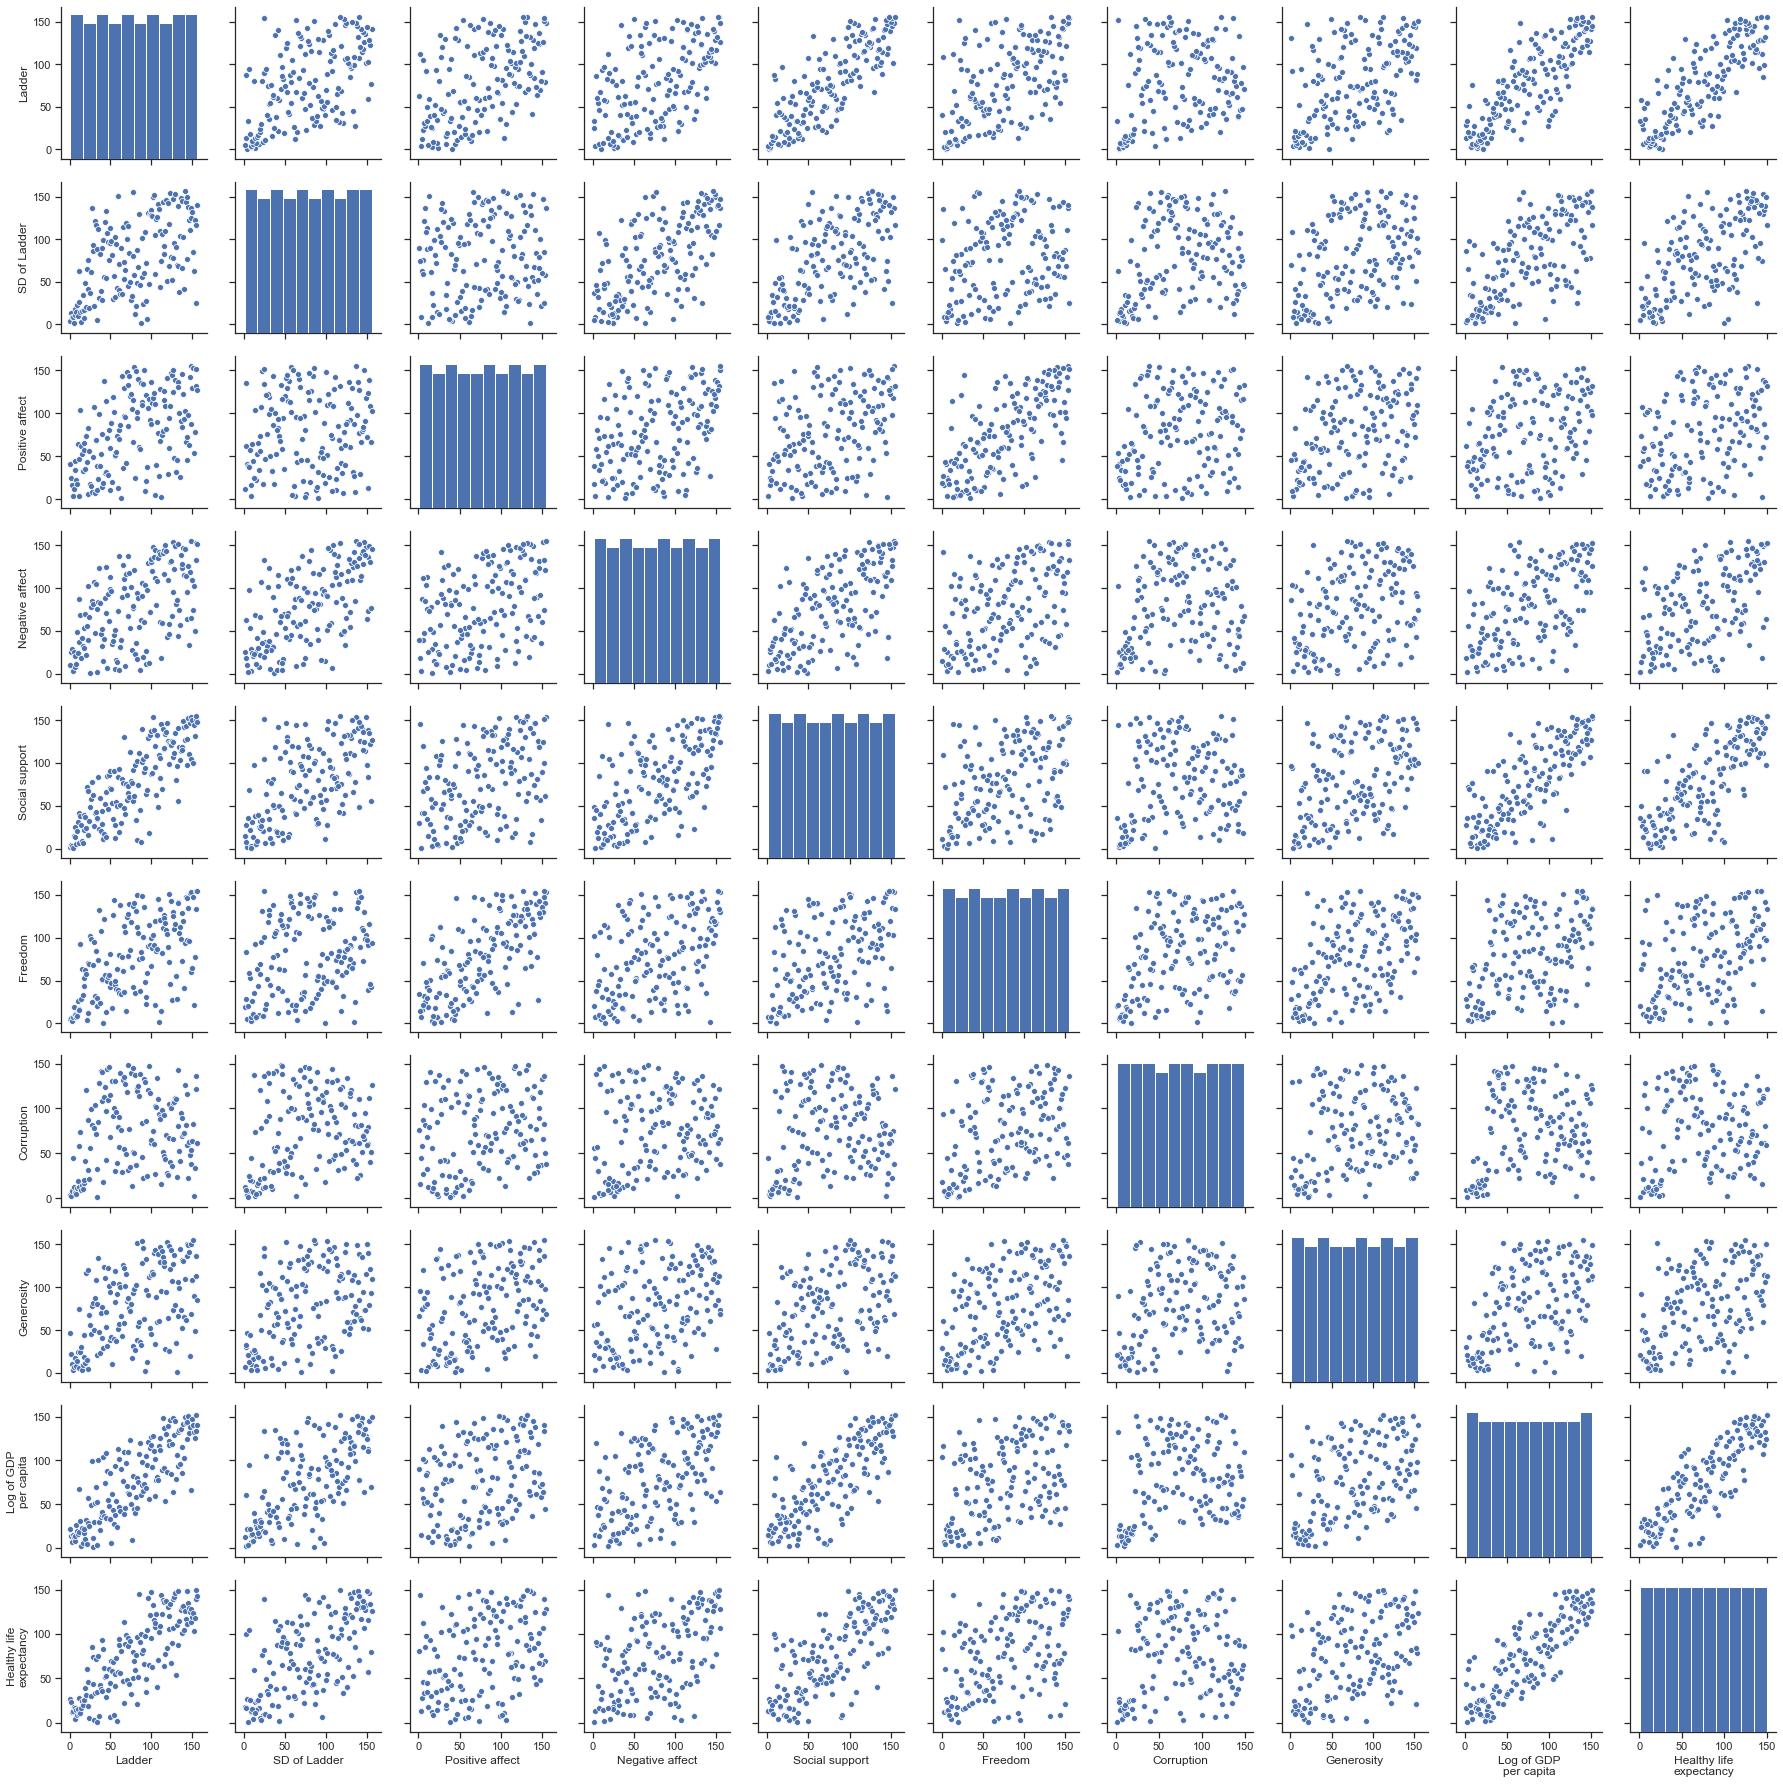

In [5]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df)

Загрузить таблицу Happiness report. Нарисовать матрицу ковариаций попарно. 

In [4]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [5]:
x = data.iloc[:,3:]

In [6]:
x=x.dropna()

In [7]:
np.cov(x.T)

array([[1965.29311408,  694.32127441,  880.13669065, 1392.96279548,
         427.18848921,  826.97194245,  597.45693731,  661.01243577],
       [ 694.32127441, 1980.79527235, 1369.01438849,  835.04152107,
         316.04028777,  697.80791367, 1091.69558068,  992.67965057],
       [ 880.13669065, 1369.01438849, 2099.08633094,  989.15107914,
         290.97841727,  918.33453237, 1592.89208633, 1521.89568345],
       [1392.96279548,  835.04152107,  989.15107914, 2034.81932169,
         784.23597122, 1005.23309353,  754.76505653,  841.06824255],
       [ 427.18848921,  316.04028777,  290.97841727,  784.23597122,
        1819.5352518 ,  536.40071942,  344.24892086,  279.47553957],
       [ 826.97194245,  697.80791367,  918.33453237, 1005.23309353,
         536.40071942, 2000.57446043,  891.58489209,  891.37446043],
       [ 597.45693731, 1091.69558068, 1592.89208633,  754.76505653,
         344.24892086,  891.58489209, 1879.76957862, 1665.84203494],
       [ 661.01243577,  992.67965057, 152

Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop). Написать код.

Ответ:

да отсутствующие значения есть
их список ниже.

In [8]:
data.isnull().sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64

In [9]:
data=data.dropna() # удалил все пустые значения

In [10]:
data.isnull().sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             0
Negative affect             0
Social support              0
Freedom                     0
Corruption                  0
Generosity                  0
Log of GDP\nper capita      0
Healthy life\nexpectancy    0
dtype: int64

Сколько стран в выборке? Написать ответ. Можно ли сказать, что данные значения - это **проблема классификации**?

In [11]:
print(f"В выборке представлено {len(data['Country (region)'])} стран")

В выборке представлено 140 стран


Нарисовать sns.pairplot для класс - страна. Из графика сделать вывод о том, какие страны похожи.

In [16]:
test = data.iloc[:,1:]

In [19]:
test

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0
5,6,11,44.0,21.0,13.0,11.0,7.0,16.0,8.0,4.0
6,7,18,34.0,8.0,25.0,10.0,6.0,17.0,13.0,17.0
7,8,15,22.0,12.0,5.0,8.0,5.0,8.0,26.0,14.0
8,9,23,18.0,49.0,20.0,9.0,11.0,14.0,19.0,8.0
9,10,10,64.0,24.0,31.0,26.0,19.0,25.0,16.0,15.0


ну код я конечно запустил, спасибо гуглу, вот источник моего решения 
https://github.com/mwaskom/seaborn/issues/1627

но из этого сделать выводы о схожести, я к сожалению затрудняюсь

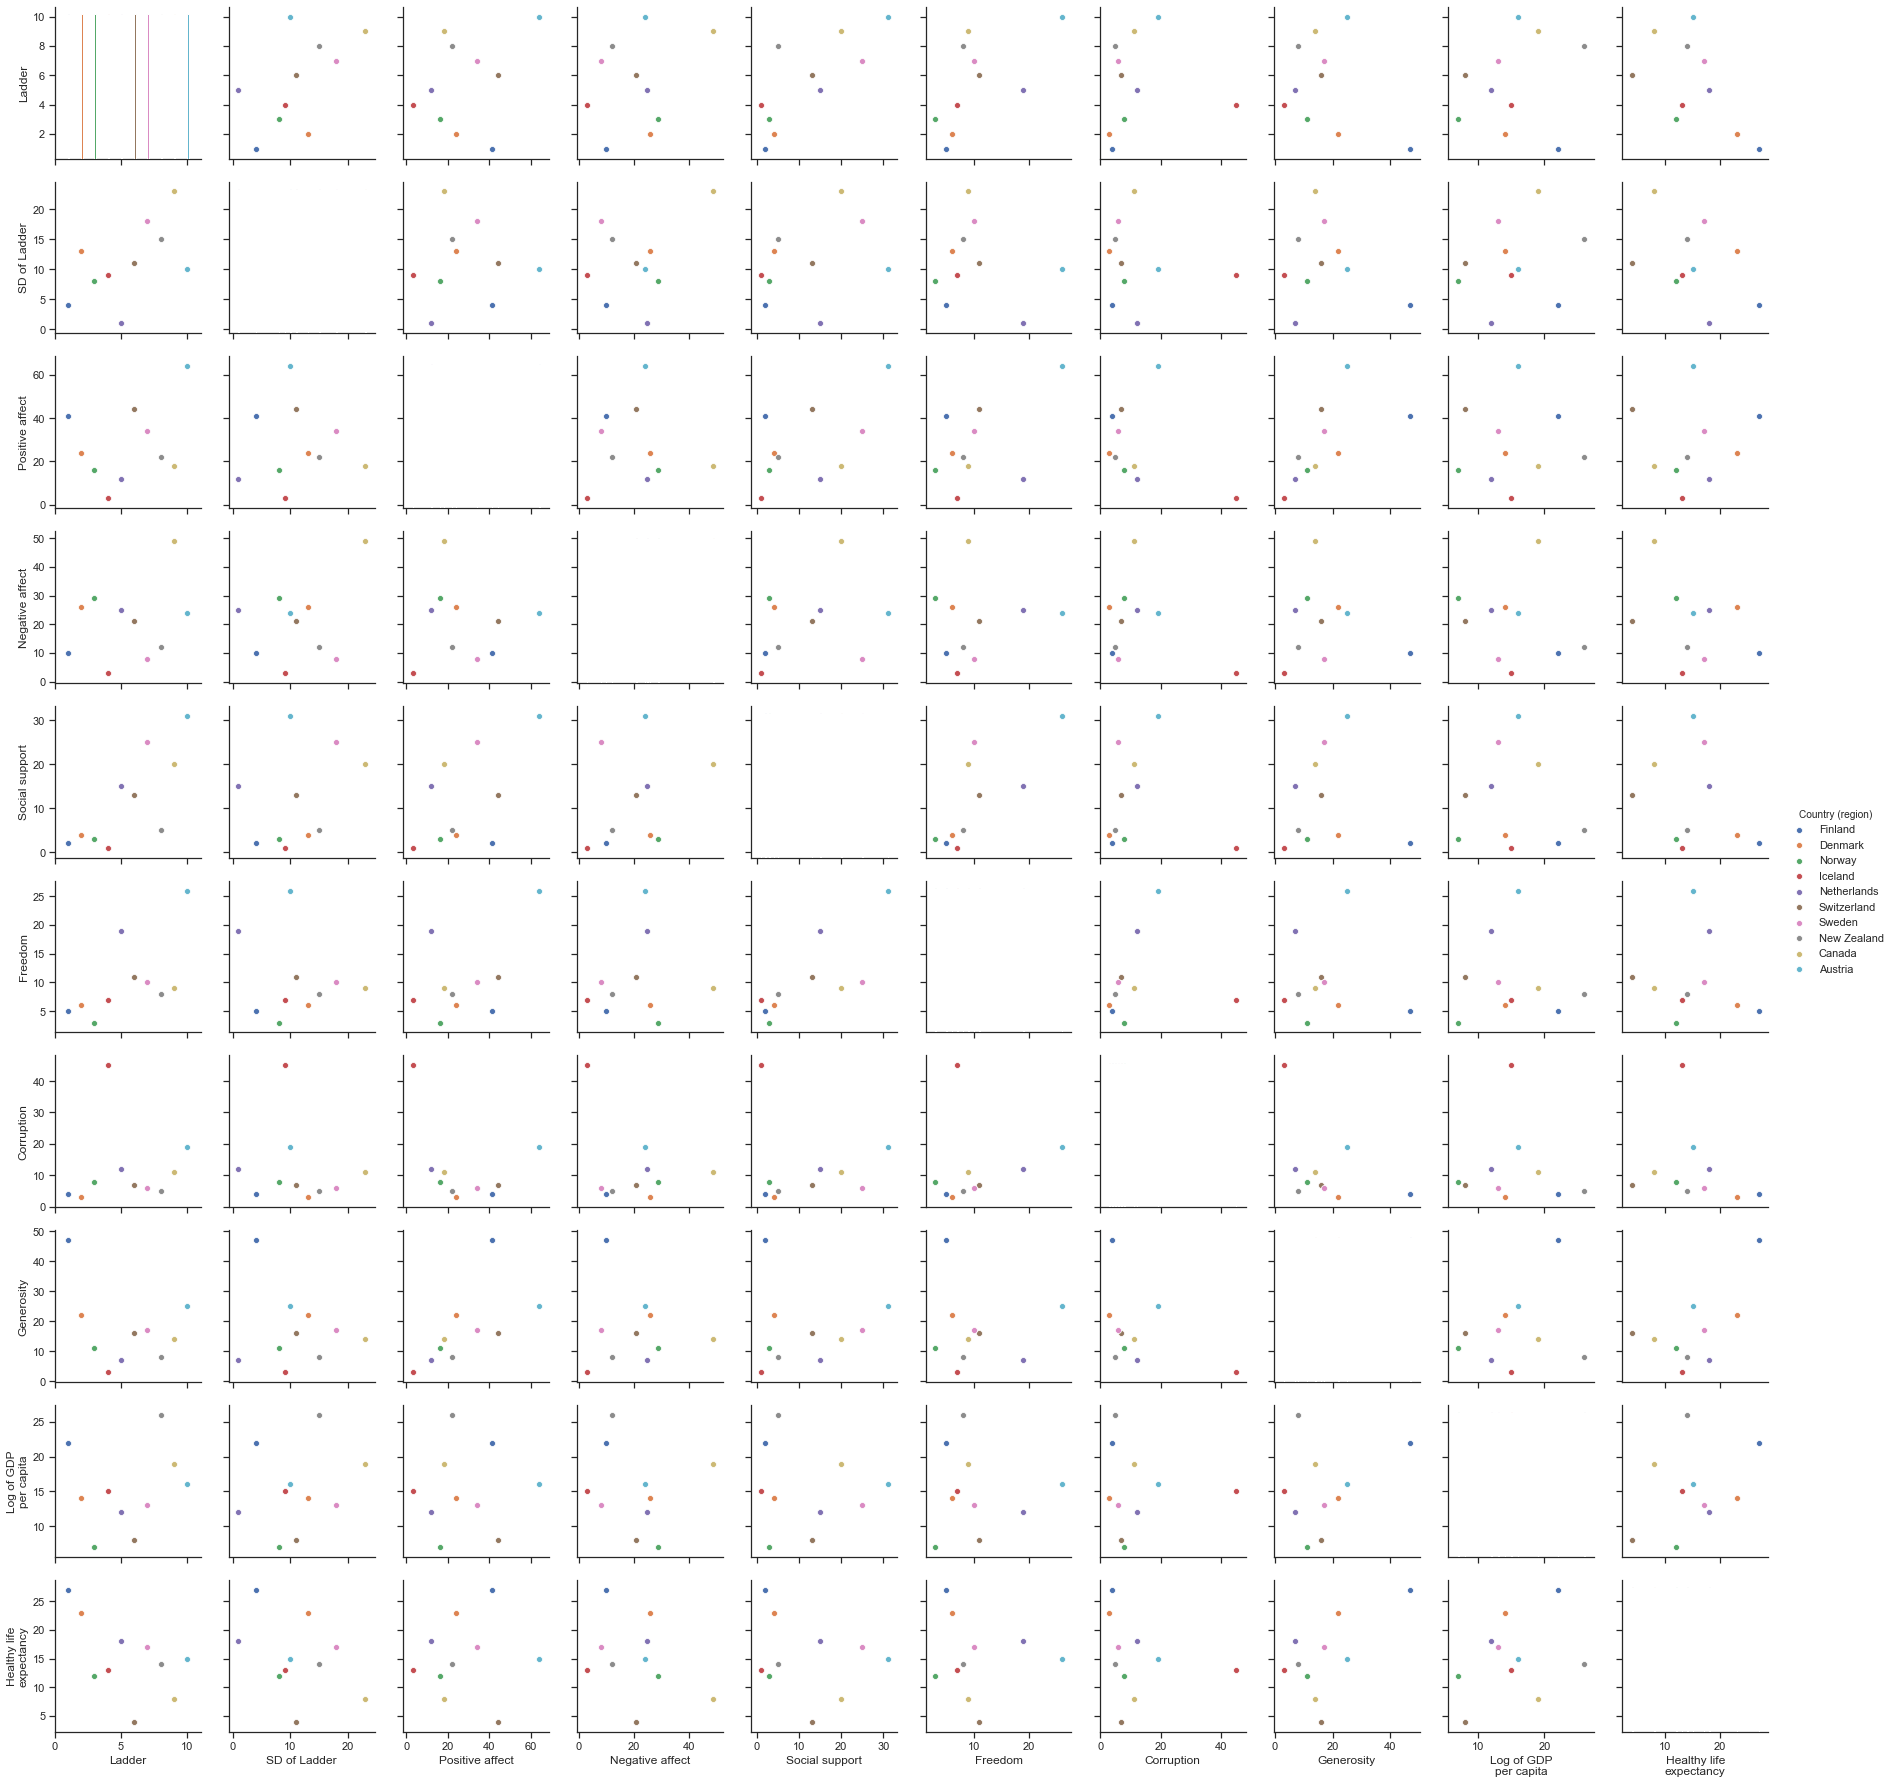

In [20]:
# Если код ниже не работает, измените код, используя материал лекций. Пишите на почту, если испытываете проблемы: yustiks@gmail.com
sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(data=data.head(10), hue='Country (region)', diag_kind='hist')
plt.show()

Посчитать матрицу корреляций для таблицы. Написать код. Сделать график. Какие можно сделать выводы?

**Регрессионный анализ** - можно ли провести линейную зависимость между двумя выборками. Возьмем Ladder - удовлетворение жизнью, и generosity - доброта. Мы хотим найти прямую, которая разделит точки в пространстве наполовину. Это можно сделать графически. Нарисовать график. Можно ли сказать, что данная прямая является собственным вектором? При проецировании данных на эту прямую разброс данных максимален?

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BED8DD1C18>]],
      dtype=object)

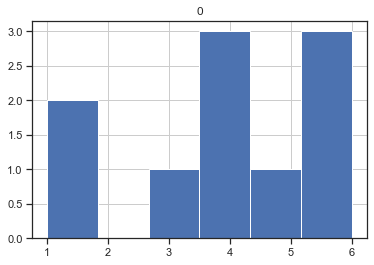

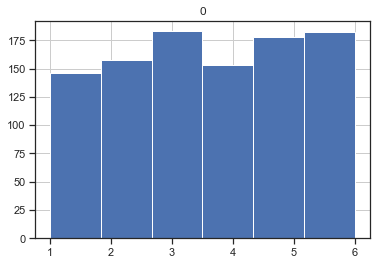

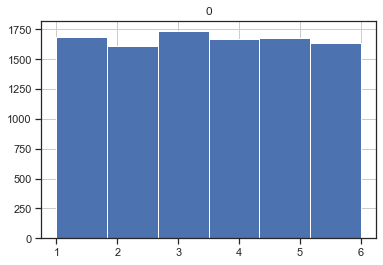

In [96]:
rng = np.random.RandomState()
rand = rng.randint(1, 7, size=10)
pd.DataFrame(rand).hist(bins=6)
rand = rng.randint(1, 7, size=1000)
pd.DataFrame(rand).hist(bins=6)
rand = rng.randint(1, 7, size=10000)
pd.DataFrame(rand).hist(bins=6)

Напишите код для моделирования 1000 подбрасываний игрального кубика. Начертите диаграму histogram. Почему график изменился? Как применить центральную предельную теорему?

Ответ

Распределения каждый раз разные, но с увеличением числа подбрасываний кубика распределение стремится стать равномерным. 
К примеру если я увеличу число подбрасываний, то оно будет стреиться стать ещё более равномерным. 
честно говоря не знаю, как это соотносится с центральной теоремой, которая утверждает,
что распредление будет стремиться к нормальному